Form på data (X): (70000, 784)
Form på etiketter (y): (70000,)


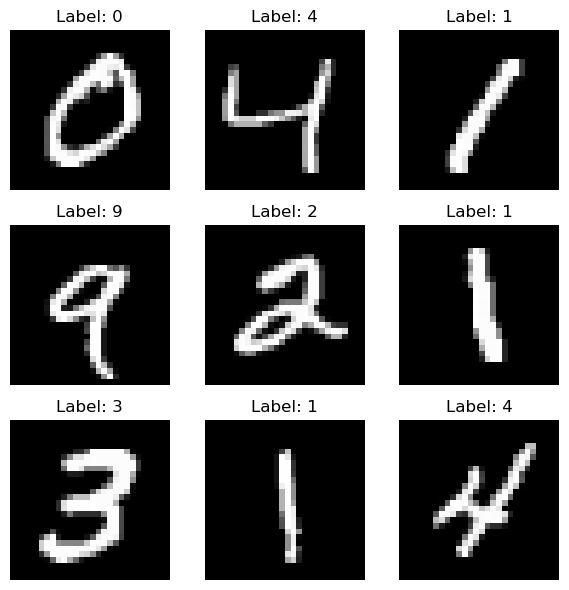

Träningsdata: (60000, 784) (60000,)
Testdata: (10000, 784) (10000,)


c:\Users\Player1\anaconda3\envs\DS24_ZAKA\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8729 - loss: 0.4155 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9828 - loss: 0.0545 - val_accuracy: 0.9862 - val_loss: 0.0450
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9890 - loss: 0.0355 - val_accuracy: 0.9852 - val_loss: 0.0430
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9902 - val_loss: 0.0332
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9900 - val_loss: 0.0362
Träningstid: 34.43 sekunder
Testförlust: 0.0295
Testnoggrannhet: 99.06%


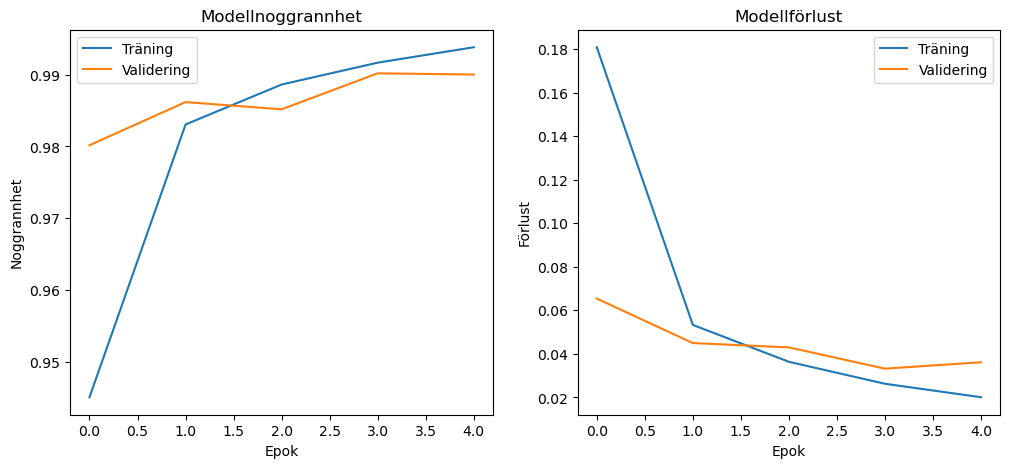

In [ ]:

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# För att hämta MNIST-data via scikit-learn:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# TensorFlow/Keras för att bygga CNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# ------------------------------------------------------------------------------
# 1. Här hämtar vi MNIST-datasetet från OpenML
#    (https://www.openml.org/d/554) och tittar på några exempel
# ------------------------------------------------------------------------------
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

print("Form på data (X):", X.shape)
print("Form på etiketter (y):", y.shape)

# Skriv ut några exempel för att verifiera att vi har rätt data
plt.figure(figsize=(6,6))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# 2. här delas data upp i tränings- och testdata
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

print("Träningsdata:", X_train.shape, y_train.shape)
print("Testdata:", X_test.shape, y_test.shape)

# ------------------------------------------------------------------------------
# 3. Förbered data för CNN  (normalisera och ändra form)
#    CNN i Keras förväntar sig data i form (antal_samples, 28, 28, 1) för gråskala         
# ------------------------------------------------------------------------------
X_train_reshaped = X_train.reshape(-1, 28, 28, 1).astype("float32")
X_test_reshaped  = X_test.reshape(-1, 28, 28, 1).astype("float32")

# Normalisera pixelvärdena till [0, 1]
X_train_norm = X_train_reshaped / 255.0
X_test_norm  = X_test_reshaped  / 255.0

# ------------------------------------------------------------------------------
# 4. Skapa CNN-modell
#    (2 Conv2D-lager, 2 MaxPooling2D-lager, 2 Dense-lager)
# ------------------------------------------------------------------------------
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 utgångar för siffrorna 0-9
])

# ------------------------------------------------------------------------------
# 5. Kompilera modellen menas med att konfigurera modellen för träning
#    (förlustfunktion, optimerare och metriker)
# ------------------------------------------------------------------------------
model.compile(
    loss='sparse_categorical_crossentropy',  # Eftersom etiketterna är heltal 0-9
    optimizer='adam',
    metrics=['accuracy']
)

# Visa sammanfattning av modellens arkitektur
model.summary()

# ------------------------------------------------------------------------------
# 6. Träna modellen
#    (5 epoker, batch_size=64, valideringssplit 10%)
# ------------------------------------------------------------------------------
start_time = time.time()

history = model.fit(
    X_train_norm, y_train,
    epochs=5,                
    batch_size=64,           
    validation_split=0.1,    # Använd 10% av träningsdata som validering
    verbose=1
)

train_time = time.time() - start_time
print(f"Träningstid: {train_time:.2f} sekunder")

# ------------------------------------------------------------------------------
# 7. Utvärdera modellen på testdata
#    (beräkna förlust och noggrannhet)  
# ------------------------------------------------------------------------------
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=0)
print(f"Testförlust: {test_loss:.4f}")
print(f"Testnoggrannhet: {test_accuracy*100:.2f}%")

# ------------------------------------------------------------------------------
# 8. Valfri visualisering av träningskurva (noggrannhet & förlust) 
#   (för att se om modellen övertränar eller undertränar) 
# ------------------------------------------------------------------------------
plt.figure(figsize=(12, 5))

# Noggrannhet / accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Träning')
plt.plot(history.history['val_accuracy'], label='Validering')
plt.title('Modellnoggrannhet')
plt.xlabel('Epok')
plt.ylabel('Noggrannhet')
plt.legend()

# Förlust / loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Träning')
plt.plot(history.history['val_loss'], label='Validering')
plt.title('Modellförlust')
plt.xlabel('Epok')
plt.ylabel('Förlust')
plt.legend()

plt.show()



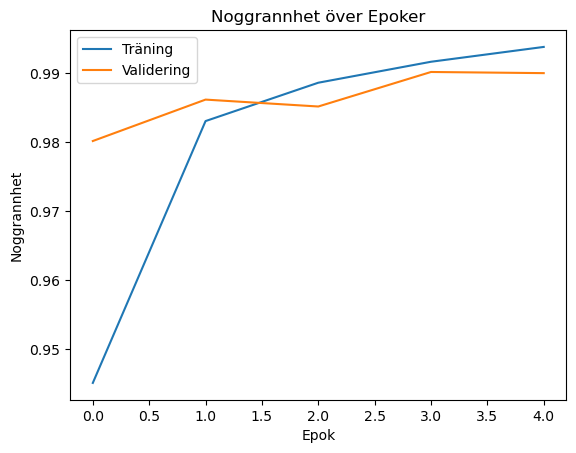

In [2]:
plt.plot(history.history['accuracy'], label='Träning')
plt.plot(history.history['val_accuracy'], label='Validering')
plt.title('Noggrannhet över Epoker')
plt.xlabel('Epok')
plt.ylabel('Noggrannhet')
plt.legend()
plt.show()


In [3]:
import os

# Ange den fullständiga sökvägen till den mapp där du vill spara modellen
model_directory = r'C:\Users\Player1\Desktop\EC Utbildning\Machine_Learning\kunskapskontroll_2_ml_ds24'

# Skapa mappen om den inte redan finns
os.makedirs(model_directory, exist_ok=True)

# Sätt filnamnet
model_path = os.path.join(model_directory, 'my_trained_model.h5')

# Spara modellen i den valda mappen
model.save(model_path)

print(f"Modellen sparades på: {model_path}")


Modellen sparades på: C:\Users\Player1\Desktop\EC Utbildning\Machine_Learning\kunskapskontroll_2_ml_ds24\my_trained_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Siffra,Precision,Recall,F1-Score
0,0,0.984985,0.997972,0.991436
1,1,0.994676,0.996444,0.995560
2,2,0.989066,0.995996,0.992519
3,3,0.990215,0.992157,0.991185
4,4,0.993814,0.988718,0.991260
5,5,0.988926,0.990022,0.989474
6,6,0.996901,0.982688,0.989744
7,7,0.992300,0.989443,0.990870
8,8,0.991736,0.984615,0.988163
9,9,0.982966,0.986922,0.984940


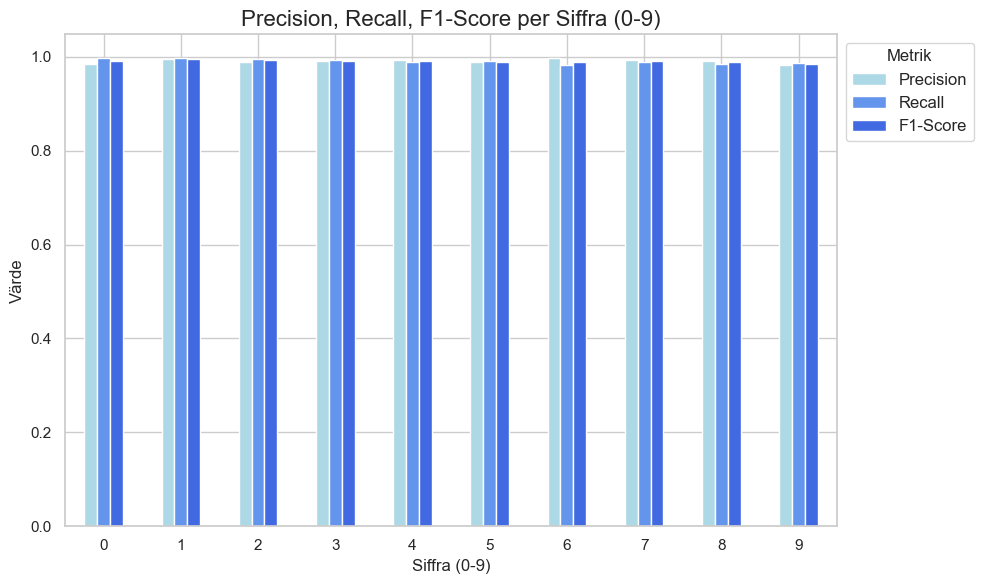

In [ ]:

from sklearn.metrics import precision_recall_fscore_support

# Prediktera testdata med din tränade modell
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)

# Beräkna precision, recall och f1-score för varje siffra (0-9)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Skapa en DataFrame med precision, recall och f1-score
metrics_df = pd.DataFrame({
    'Siffra': np.arange(10),
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

def highlight_col(col):
    """
    col är en Series med precision, recall eller f1-score för alla rader.
    Vi returnerar en lista med bakgrundsfärg för varje cell i kolumnen.
    """
    styled_col = []
    for val in col:
        if np.isnan(val):
            styled_col.append('background-color: none')
        elif val >= 0.99:
            styled_col.append('background-color: cornflowerblue')
        elif val >= 0.994:
            styled_col.append('background-color: royalblue')
        else:
            styled_col.append('background-color: royalblue')
    return styled_col

# axis=0 betyder att vi itererar kolumnvis (Precision, Recall, F1-Score).
styled = metrics_df.style.apply(highlight_col, subset=['Precision', 'Recall', 'F1-Score'], axis=0)

# Visa tabellen
from IPython.display import display
display(styled)

# Skapa diagrammet för precision, recall och F1-score
fig, ax = plt.subplots(figsize=(10, 6))

# Visualisera precision, recall och F1-score
metrics_df.set_index('Siffra')[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', ax=ax, color=['lightblue', 'cornflowerblue', 'royalblue'])

# rubriker och etiketter
plt.title('Precision, Recall, F1-Score per Siffra (0-9)', fontsize=16)
plt.xlabel('Siffra (0-9)', fontsize=12)
plt.ylabel('Värde', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrik', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


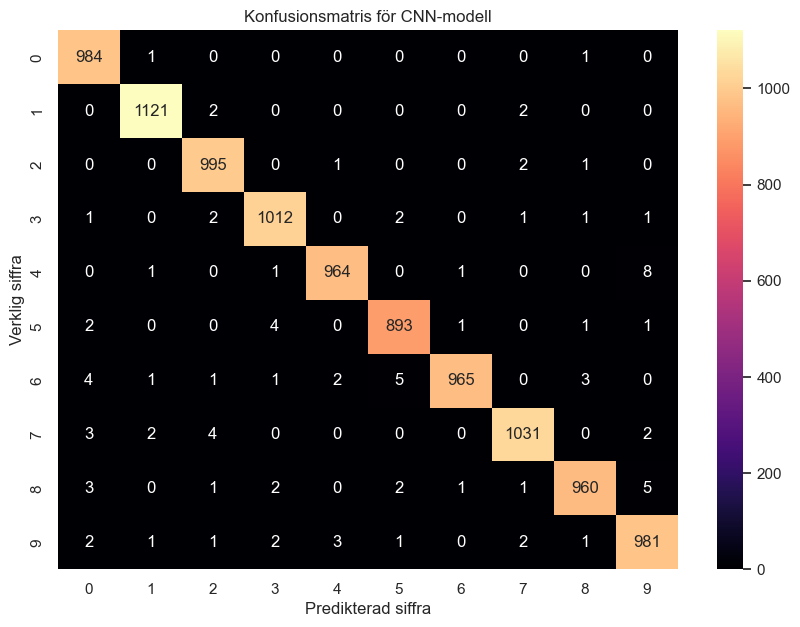

In [69]:


import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Prediktera testdata med din tränade KNN-modell
y_pred_prob = model.predict(X_test_norm)
y_pred = np.argmax(y_pred_prob, axis=1)  # Konvertera sannolikheter till klassindex

# Skapa konfusionsmatris
cm = confusion_matrix(y_test, y_pred)

# Visualisera konfusionsmatrisen
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.xlabel("Predikterad siffra")
plt.ylabel("Verklig siffra")
plt.title("Konfusionsmatris för CNN-modell")
plt.show()


# **Förklaring av Precision, Recall, Accuracy och F1-score**

---

##  1. Accuracy (Noggrannhet)
Accuracy mäter **hur många av modellens förutsägelser som är korrekta totalt sett**.

$$
\text{Accuracy} = \frac{\text{Antal rätta förutsägelser}}{\text{Totalt antal förutsägelser}}
$$

---

##  2. Precision (Precision)
Precision svarar på frågan: **"När modellen säger att något är en viss siffra, hur ofta har den rätt?"**.

$$
\text{Precision} = \frac{\text{Sant Positiva (TP)}}{\text{Sant Positiva (TP) + Falskt Positiva (FP)}}
$$

---

##  3. Recall (Känslighet)
Recall svarar på frågan: **"Hur många av de verkliga fallen hittar modellen?"**.

$$
\text{Recall} = \frac{\text{Sant Positiva (TP)}}{\text{Sant Positiva (TP) + Falskt Negativa (FN)}}
$$

---

##  4. F1-Score (Balans mellan Precision & Recall) 
F1-score är **en kombination av Precision och Recall**, för att hitta en balans mellan de två.

$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

##  Sammanfattningstabell

| Mått         | Formel | Vad betyder det? | När används det? |
|-------------|---------|----------------|----------------|
| **Accuracy** | $$\frac{TP + TN}{TP + TN + FP + FN}$$ | Hur många av alla förutsägelser som var rätt? | När alla klasser är lika vanliga. |
| **Precision** | $$\frac{TP}{TP + FP}$$ | När modellen säger att något är sant, hur ofta har den rätt? | När vi vill undvika falska positiva (ex. spam-filter, medicinska tester). |
| **Recall** | $$\frac{TP}{TP + FN}$$ | Hur många av de verkliga fallen hittar modellen? | När vi vill undvika falska negativa (ex. cancer-diagnoser, säkerhetskontroller). |
| **F1-score** | $$2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$ | En balans mellan Precision och Recall. | När båda måtten är lika viktiga. |

---
